Библиотеки

In [ ]:
# Работа с df
import pandas as pd
# Препроцессинг
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import download
download('punkt')
download('stopwords')
# N-grams
from nltk import FreqDist
from nltk.util import ngrams
# Визуализация
#pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_json("reviews_titles.json")
titles = df['title'].tolist()

Препроцессинг

In [ ]:
def preprocess_titles(titles):
    # Нижний регистр
    titles = [title.lower() for title in titles]
    # Пунктуцация
    titles = [title.translate(str.maketrans("", "", string.punctuation)) for title in titles]
    # Токенизация
    words = [nltk.word_tokenize(title) for title in titles]
    # Стоп-слова
    stop_words = set(stopwords.words("english"))
    words = [[word for word in title_words if word not in stop_words] for title_words in words]
    # Стемминг
    stemmer = SnowballStemmer("english")
    words = [[stemmer.stem(word) for word in title_words] for title_words in words]
    # Объединяем заголовки
    titles = [" ".join(title_words) for title_words in words]
    return titles
preprocessed_titles = preprocess_titles(titles)
print(preprocessed_titles)

['except', 'overal good', 'fabul histor gem quiet locat close citi', 'overal stay enjoy everyth import cater', 'good spot help staff', 'superb', 'perfect locat', 'disappoint window sound proof unfortun consid price', 'nice hotel pricey get', 'good', 'except', 'except', 'enjoy round', 'except', 'superb', 'perfect place stay would high recommend anyon look get away', 'comfort conveni friend staff', 'except comfort enjoy', 'except', 'good', '9510', 'great place would recommend anyon solo otherwis', 'ok', 'passabl u day sleep', 'definit recommend coupl solo travel friend', 'relax friend atmospher love surround', 'good short stay', 'would consid less like two peopl', 'calm environ', 'good stay minimalist awesom locat good memori', 'good', 'passabl', 'good stay two three night', 'good', 'best valu short stay ireland', 'expens student accommod', 'good', 'great locat conveni near cafe centr', 'inexpens conveni place', 'good', 'still good overal', 'clean function bit expens earli checkout', 'pl

Работа с n-grams

In [ ]:
def find_unigrams(titles):
    words = [nltk.word_tokenize(title) for title in titles]
    unigrams = [ngram for title_words in words for ngram in ngrams(title_words, 1)]
    freq_dist = FreqDist(unigrams)
    return freq_dist.most_common(20)
def find_bigrams(titles):
    words = [nltk.word_tokenize(title) for title in titles]
    bigrams = [ngram for title_words in words for ngram in ngrams(title_words, 2)]
    freq_dist = FreqDist(bigrams)
    return freq_dist.most_common(20)
def find_trigrams(titles):
    words = [nltk.word_tokenize(title) for title in titles]
    trigrams = [ngram for title_words in words for ngram in ngrams(title_words, 3)]
    freq_dist = FreqDist(trigrams)
    return freq_dist.most_common(20)
def find_quatrograms(titles):
    words = [nltk.word_tokenize(title) for title in titles]
    quatrograms = [ngram for title_words in words for ngram in ngrams(title_words, 4)]
    freq_dist = FreqDist(quatrograms)
    return freq_dist.most_common(20)

In [ ]:
unigrams = find_unigrams(preprocessed_titles)
print(unigrams)

[(('good',), 733), (('stay',), 422), (('great',), 408), (('except',), 362), (('locat',), 324), (('superb',), 268), (('dublin',), 163), (('place',), 162), (('staff',), 149), (('hotel',), 144), (('comfort',), 137), (('love',), 136), (('nice',), 126), (('would',), 112), (('room',), 103), (('perfect',), 102), (('excel',), 94), (('valu',), 91), (('recommend',), 84), (('citi',), 82)]


In [ ]:
bigrams = find_bigrams(preprocessed_titles)
print(bigrams)

[(('great', 'locat'), 120), (('place', 'stay'), 53), (('great', 'stay'), 50), (('good', 'locat'), 41), (('valu', 'money'), 39), (('good', 'valu'), 34), (('high', 'recommend'), 32), (('great', 'valu'), 32), (('love', 'stay'), 32), (('would', 'stay'), 31), (('friend', 'staff'), 30), (('great', 'place'), 30), (('enjoy', 'stay'), 28), (('stay', 'dublin'), 27), (('short', 'stay'), 25), (('perfect', 'locat'), 24), (('great', 'hotel'), 22), (('excel', 'locat'), 21), (('citi', 'centr'), 20), (('locat', 'good'), 18)]


In [ ]:
trigrams = find_trigrams(preprocessed_titles)
print(trigrams)

[(('would', 'high', 'recommend'), 14), (('good', 'valu', 'money'), 12), (('great', 'valu', 'money'), 12), (('locat', 'good', 'valu'), 9), (('great', 'place', 'stay'), 9), (('definit', 'come', 'back'), 8), (('place', 'stay', 'dublin'), 8), (('hotel', 'great', 'locat'), 8), (('good', 'place', 'stay'), 7), (('staff', 'great', 'locat'), 7), (('perfect', 'place', 'stay'), 6), (('nice', 'place', 'stay'), 6), (('great', 'locat', 'comfort'), 6), (('stay', 'great', 'locat'), 6), (('good', 'short', 'stay'), 5), (('would', 'recommend', 'hotel'), 5), (('stay', 'one', 'night'), 5), (('realli', 'enjoy', 'stay'), 5), (('great', 'locat', 'price'), 5), (('comfort', 'great', 'locat'), 5)]


In [ ]:
quatrograms = find_quatrograms(preprocessed_titles)
print(quatrograms)

[(('locat', 'good', 'valu', 'money'), 5), (('good', 'locat', 'good', 'valu'), 3), (('stay', 'one', 'night', 'good'), 3), (('love', 'stay', 'citi', 'centr'), 3), (('afford', 'place', 'stay', 'dublin'), 3), (('good', 'valu', 'good', 'locat'), 3), (('great', 'valu', 'great', 'locat'), 3), (('locat', 'heart', 'templ', 'bar'), 3), (('great', 'locat', 'good', 'valu'), 3), (('great', 'locat', 'friend', 'staff'), 3), (('stay', 'would', 'high', 'recommend'), 2), (('nice', 'place', 'stay', 'close'), 2), (('nice', 'place', 'stay', 'afford'), 2), (('amaz', 'would', 'high', 'recommend'), 2), (('conveni', 'pleasant', 'stay', 'would'), 2), (('pleasant', 'stay', 'would', 'recommend'), 2), (('stay', 'would', 'recommend', 'group'), 2), (('would', 'recommend', 'group', 'friend'), 2), (('excel', 'locat', 'easi', 'check'), 2), (('locat', 'easi', 'check', 'friend'), 2)]


Облако слов

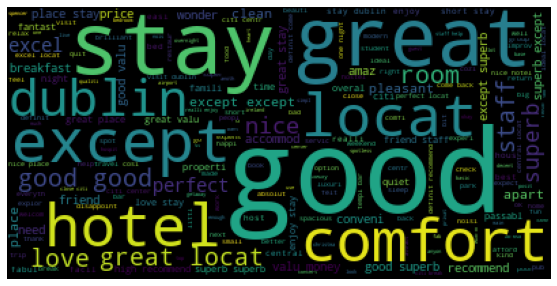

In [ ]:
wordcloud = WordCloud().generate(', '.join(preprocessed_titles))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
word_frequency = pd.DataFrame({'Unigrams': unigrams, 'Bigrams': bigrams, 'Trigrams': trigrams, 'Quatrograms': quatrograms})
word_frequency.to_csv("Word_frequency.csv", index=False)
word_frequency.to_excel("Word_frequency.xlsx")

In [ ]:
df = pd.read_csv('Word_frequency.csv')

In [ ]:
df.head(10)

,Unigrams,Bigrams,Trigrams,Quatrograms
0,"(('good',), 733)","(('great', 'locat'), 120)","(('would', 'high', 'recommend'), 14)","(('locat', 'good', 'valu', 'money'), 5)"
1,"(('stay',), 422)","(('place', 'stay'), 53)","(('good', 'valu', 'money'), 12)","(('good', 'locat', 'good', 'valu'), 3)"
2,"(('great',), 408)","(('great', 'stay'), 50)","(('great', 'valu', 'money'), 12)","(('stay', 'one', 'night', 'good'), 3)"
3,"(('except',), 362)","(('good', 'locat'), 41)","(('locat', 'good', 'valu'), 9)","(('love', 'stay', 'citi', 'centr'), 3)"
4,"(('locat',), 324)","(('valu', 'money'), 39)","(('great', 'place', 'stay'), 9)","(('afford', 'place', 'stay', 'dublin'), 3)"
5,"(('superb',), 268)","(('good', 'valu'), 34)","(('definit', 'come', 'back'), 8)","(('good', 'valu', 'good', 'locat'), 3)"
6,"(('dublin',), 163)","(('high', 'recommend'), 32)","(('place', 'stay', 'dublin'), 8)","(('great', 'valu', 'great', 'locat'), 3)"
7,"(('place',), 162)","(('great', 'valu'), 32)","(('hotel', 'great', 'locat'), 8)","(('locat', 'heart', 'templ', 'bar'), 3)"
8,"(('staff',), 149)","(('love', 'stay'), 32)","(('good', 'place', 'stay'), 7)","(('great', 'locat', 'good', 'valu'), 3)"
9,"(('hotel',), 144)","(('would', 'stay'), 31)","(('staff', 'great', 'locat'), 7)","(('great', 'locat', 'friend', 'staff'), 3)"
